# Mushroom Edibility Classification

**Link**

https://www.kaggle.com/uciml/mushroom-classification

**Context**

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

**Content**

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified through the target attribute `class` as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

The dataset consists of the following attributes:
- class - edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

**Task (Classification)**

Your task is to use the present data set to predict the edibility of a mushroom sample. To do this, use the `Logistic Regression` and `XGBoost` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

**ML Project Checklist**
1. Frame the problem and look at the big picture. 
2. Get the data. 
3. Explore the data to gain insights. 
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms. 
5. Explore many different models and short-list the best ones. 
6. Fine-tune your models and combine them into a great solution. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.

# 1. Framing the problem

The primary objective of this project is to estimate the probability that a given mushroom sample is edible, based on various features such as gill size, cap color, and other morphological characteristics. 

The resulting machine learning models could potentially be integrated into a broader **"mushroom guidance" application**. In such an app, users could take a photo of a mushroom, and the system would provide an initial estimate of its edibility. This approach frames the problem as a supervised learning classification task, where performance can be measured using metrics such as accuracy, precision, and recall. Thus, besides a full-feature model, a more specified "user" model trained on a reduced feature space solely including visual features has been implemented.
Given the real-world risk of misclassification, particular attention must be paid to minimizing false positives (i.e., predicting a poisonous mushroom as edible). While a reliable system would need to exceed a defined accuracy threshold to be considered practical, the aim of this project is to assess feasibility.

Nonetheless, real-life expertise should not be disregarded. The application could also support experts by providing a second opinion, comparable to how machine learning assists doctors with diagnostics in fields like radiology. This hybrid approach (combining expert knowledge with algorithmic estimation) could lead to more robust and safer classification outcomes.

# 2. Getting the data
 
The data has been downloaded and stored in CSV format to facilitate loading and manipulation within standard data science tools such as Pandas. A copy from the original data was created to perform the following data analysis and model training steps on.

**Außerdem zu erwähnen**:
- mussten manche Daten hinzugefügt werden weil "?"- oder "NaN"-Eintrag ?
- 

In [140]:
### LIBRARIES ###

# ─── Standard ────────────────────────────────────────────────────────
import math
from typing import List, Optional
import time

# ─── Data Handling ───────────────────────────────────────────────────
import pandas as pd
import numpy as np

# ─── Visualization ───────────────────────────────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns   

# ─── Preprocessing & Pipeline ────────────────────────────────────────
from scipy.stats import chi2_contingency
from itertools import combinations

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler
)
from sklearn.compose import ColumnTransformer

# ─── Models & Hyperparameter-Tuning ─────────────────────────────────
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier


from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV
)

# ─── Metrics ─────────────────────────────────────────────────────────
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

from sklearn.metrics import make_scorer

# ─── Encoder / Transformer ───────────────────────────────────────────
from sklearn.base import BaseEstimator, TransformerMixin


In [141]:
df_raw = pd.read_csv(r'data/mushrooms.csv')
print(f"Raw Data: {df_raw.shape[0]} rows, {df_raw.shape[1]} columns")

# create copies of the original DataFrame
df = df_raw.copy()

Raw Data: 8124 rows, 23 columns


# 3. Exploring the data


The dataset, sourced from the UCI Machine Learning Repository, consists of 8,124 complete samples with no missing values. It includes 23 categorical features, each representing a specific characteristic of mushrooms, such as cap-shape, odor, veil-color, and habitat. All variables are categorical, with varying cardinality: while some, like the target variable edibility, are binary, others, such as gill-color, contain more than 10 distinct categories. 

General guidelines:
- Create a copy of the data for exploration (down sampling if necessary).
- Keep record of your data exploration (Jupyter notebook).
- Study each attribute and its characteristics: 
    Name, Type (categorical, int/float, bounded/unbounded, text, structured, etc.), % missing values, Noisiness (stochastic, outliers, rounding errors, etc.), 
    Type of distribution (Gaussian, uniform, logarithmic, etc.), Possibly useful for the task?
- For supervised learning tasks, identify the target attribute(s).
- Visualize the data. -> Scatterplot, HeatMaps etc
- Study the correlations between attributes.
- Study how you would solve the problem manually.
- Identify the promising transformations you may want to apply.
- Identify extra data that would be useful.
- Document what you have learned.

In [142]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [143]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [145]:
b = 8
h = 5

C:\Users\st\AppData\Local\Temp\ipykernel_10900\946814136.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Essbarkeit', y='Anzahl', data=essbarkeit_counts, palette=palette)


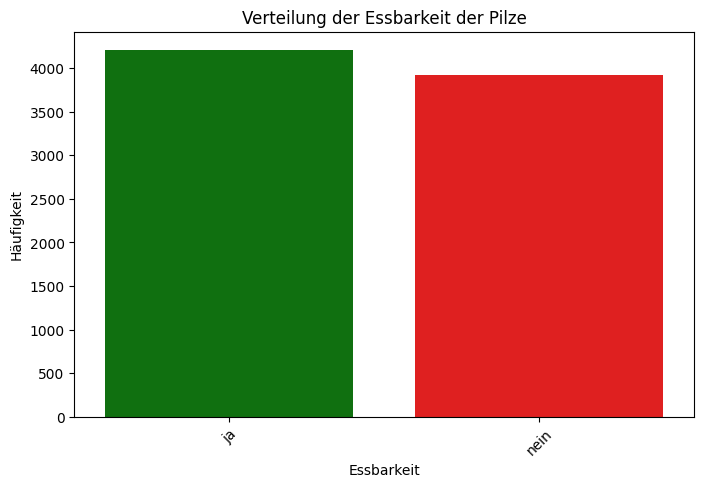

In [146]:
df = df.rename(columns={'class': 'Essbarkeit'})

# Umbenennen der Spalte 'class' zu 'Essbarkeit'
df = df.rename(columns={'class': 'Essbarkeit'})

# Ersetzen der Werte für die Essbarkeit
df['Essbarkeit'] = df['Essbarkeit'].replace({'e': 'ja', 'p': 'nein'})

# Aggregation der Daten für den Plot
essbarkeit_counts = df['Essbarkeit'].value_counts().reset_index()
essbarkeit_counts.columns = ['Essbarkeit', 'Anzahl']

# Farbpalette definieren
palette = {'ja': 'green', 'nein': 'red'}

# Plot erzeugen
plt.figure(figsize=(b, h))  # Beispielgröße
sns.barplot(x='Essbarkeit', y='Anzahl', data=essbarkeit_counts, palette=palette)

# Titel und Achsenbeschriftungen
plt.title('Verteilung der Essbarkeit der Pilze')
plt.xlabel('Essbarkeit')
plt.ylabel('Häufigkeit')

# Beschriftungen der x-Achse schräg anzeigen
plt.xticks(rotation=45)

plt.show()

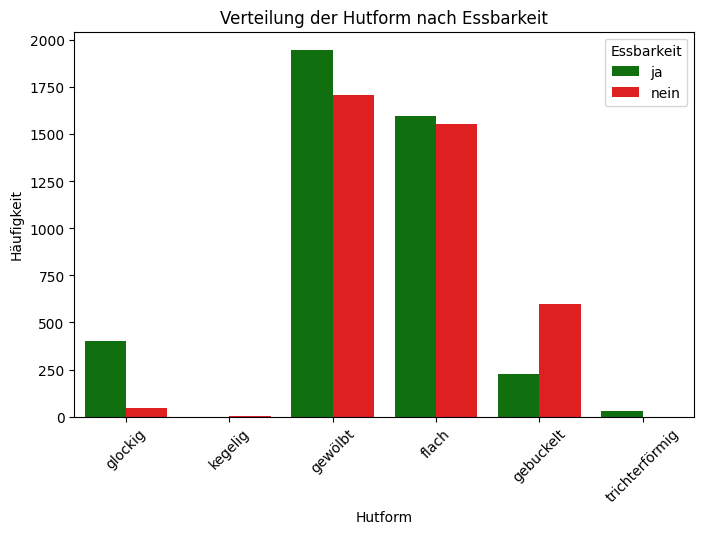

In [147]:
# With 'paired bar' plots there is a good vizualation for the dependecy of single attributes, what can be very useful for classifing data.

# Kopie des DataFrames mit lesbaren Werten
labeled_data = df.copy()
labeled_data['cap-shape'] = labeled_data['cap-shape'].map(shape_names)

# Gruppieren der Daten
shape_order = list(shape_names.values())
essbarkeit_order = ['ja', 'nein']
labeled_data = labeled_data.groupby(['cap-shape', 'Essbarkeit']).size().reset_index(name='count')

# Sicherstellen, dass alle Kombinationen vorhanden sind
all_combinations = pd.MultiIndex.from_product([shape_order, essbarkeit_order], names=['cap-shape', 'Essbarkeit'])
labeled_data = labeled_data.set_index(['cap-shape', 'Essbarkeit']).reindex(all_combinations, fill_value=0).reset_index()

# Farbpalette definieren
palette = {'ja': 'green', 'nein': 'red'}

# Plot erzeugen
plt.figure(figsize=(b, h))  # Beispielgröße, b und h kannst du anpassen
sns.barplot(x='cap-shape', y='count', hue='Essbarkeit', data=labeled_data, palette=palette)

# Titel und Achsenbeschriftungen
plt.title('Verteilung der Hutform nach Essbarkeit')
plt.xlabel('Hutform')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=45)  # Um die Beschriftungen lesbar zu halten

plt.show()

# First paired bar plot has a random attribute to show the type of plot.



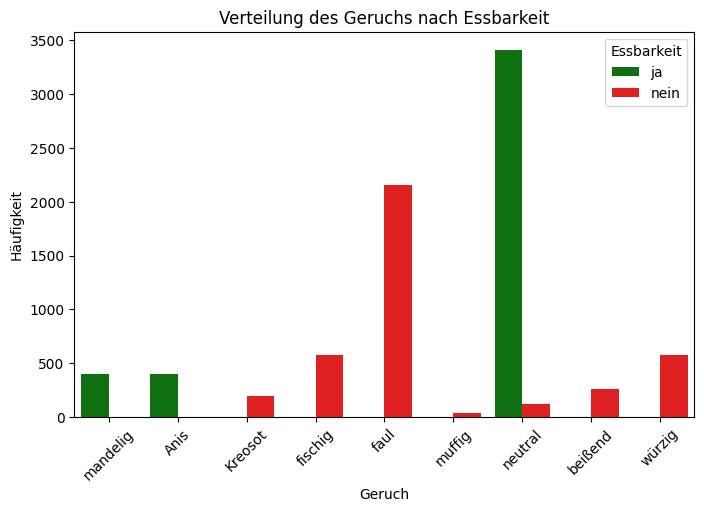

In [148]:
# Mapping der Kürzel zu den Namen
odor_names = {
    'a': 'mandelig', 
    'l': 'Anis', 
    'c': 'Kreosot', 
    'y': 'fischig', 
    'f': 'faul', 
    'm': 'muffig', 
    'n': 'neutral', 
    'p': 'beißend', 
    's': 'würzig'
}

# Kopie des DataFrames mit lesbaren Werten
labeled_data = df.copy()
labeled_data['odor'] = labeled_data['odor'].map(odor_names)

# Gruppieren der Daten
odor_order = list(odor_names.values())
essbarkeit_order = ['ja', 'nein']
labeled_data = labeled_data.groupby(['odor', 'Essbarkeit']).size().reset_index(name='count')

# Alle Kombinationen für 'odor' und 'Essbarkeit' hinzufügen, falls sie fehlen
all_combinations = pd.MultiIndex.from_product([odor_order, essbarkeit_order], names=['odor', 'Essbarkeit'])
labeled_data = labeled_data.set_index(['odor', 'Essbarkeit']).reindex(all_combinations, fill_value=0).reset_index()

# Farbpalette für die Edibilität
palette = {'ja': 'green', 'nein': 'red'}

# Plot erzeugen
plt.figure(figsize=(b, h))  # Beispielgröße für b und h
sns.barplot(x='odor', y='count', hue='Essbarkeit', data=labeled_data, palette=palette)

# Titel und Achsenbeschriftungen
plt.title('Verteilung des Geruchs nach Essbarkeit')
plt.xlabel('Geruch')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=45)
plt.show()


# In this paired bar plot you can clearly see that oder is a very important indicator for edibility.

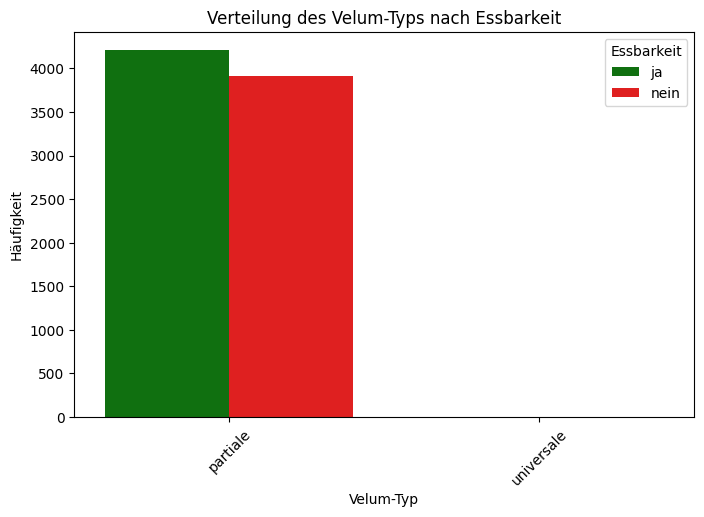

In [149]:
# Mapping der Kürzel zu den Namen
veil_type_names = {'p': 'partiale', 'u': 'universale'}

# Kopie des DataFrames mit lesbaren Werten
labeled_data = df.copy()
labeled_data['veil-type'] = labeled_data['veil-type'].map(veil_type_names)

# Sortierung und Gruppierung der Daten
veil_type_order = list(veil_type_names.values())
essbarkeit_order = ['ja', 'nein']
labeled_data = labeled_data.groupby(['veil-type', 'Essbarkeit']).size().reset_index(name='count')

# Sicherstellen, dass alle Kombinationen vorhanden sind
all_combinations = pd.MultiIndex.from_product([veil_type_order, essbarkeit_order], names=['veil-type', 'Essbarkeit'])
labeled_data = labeled_data.set_index(['veil-type', 'Essbarkeit']).reindex(all_combinations, fill_value=0).reset_index()

# Farbpalette definieren
palette = {'ja': 'green', 'nein': 'red'}

# Plot erzeugen
plt.figure(figsize=(b, h))  # Beispielgröße
sns.barplot(x='veil-type', y='count', hue='Essbarkeit', data=labeled_data, palette=palette)

# Titel und Achsenbeschriftungen
plt.title('Verteilung des Velum-Typs nach Essbarkeit')
plt.xlabel('Velum-Typ')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=45)  # Falls die Beschriftungen lang sind

plt.show()


# There are two veil types, partial or universial. In this data set there are only mushrooms with partial veil. 
# For that reason universial is not shown in this plot. The whole coloumn can be deleted as it is useless in this data set.


In [150]:
# double checked with value_counts()

veil_type_counts = df["veil-type"].value_counts()

print(veil_type_counts)


veil-type
p    8124
Name: count, dtype: int64


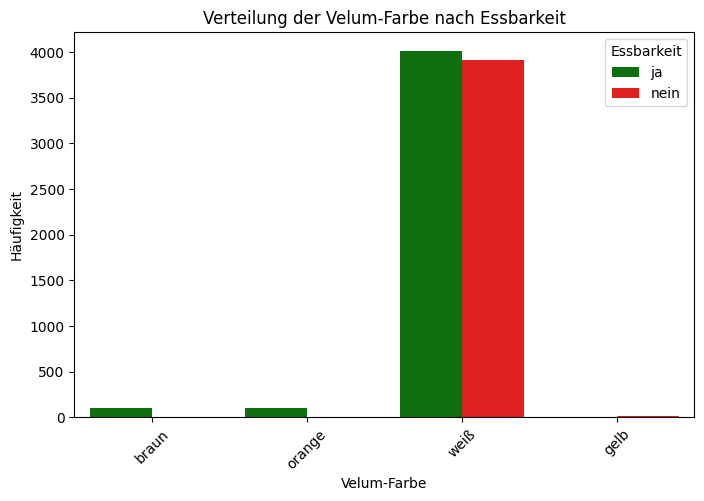

In [151]:
# Mapping der Kürzel zu den Namen
veil_color_names = {'n': 'braun', 'o': 'orange', 'w': 'weiß', 'y': 'gelb'}

# Kopie des DataFrames mit lesbaren Werten
labeled_data = df.copy()
labeled_data['veil-color'] = labeled_data['veil-color'].map(veil_color_names)

# Gruppieren der Daten
veil_color_order = list(veil_color_names.values())
essbarkeit_order = ['ja', 'nein']
labeled_data = labeled_data.groupby(['veil-color', 'Essbarkeit']).size().reset_index(name='count')

# Sicherstellen, dass alle Kombinationen vorhanden sind
all_combinations = pd.MultiIndex.from_product([veil_color_order, essbarkeit_order], names=['veil-color', 'Essbarkeit'])
labeled_data = labeled_data.set_index(['veil-color', 'Essbarkeit']).reindex(all_combinations, fill_value=0).reset_index()

# Farbpalette definieren
palette = {'ja': 'green', 'nein': 'red'}

# Plot erzeugen
plt.figure(figsize=(b, h))  # Beispielgröße, b und h kannst du nach Bedarf anpassen
sns.barplot(x='veil-color', y='count', hue='Essbarkeit', data=labeled_data, palette=palette)

# Titel und Achsenbeschriftungen
plt.title('Verteilung der Velum-Farbe nach Essbarkeit')
plt.xlabel('Velum-Farbe')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=45)  # Um die Beschriftungen lesbar zu halten

plt.show()

# Data for veil-color are very unbalanced. There are no poisonus mushrooms with brown or organge veil. 
# But there are in realitiy for example Cortinarius rubellus with an orange veil. So veil-color has to be handled with care.
# For possible future data this property will stay in the data set.
# Other unbalanced properties are gill-attachment and ring-number.


In [152]:
def cramers_v(x, y):
    """
    Compute Cramér’s V measure of association between two nominal variables x and y.
    """
    # 1. Build a contingency table of counts
    ct = pd.crosstab(x, y)
    # 2. Total number of observations
    n = ct.values.sum()
    # 3. Number of rows (r) and columns (k) in the table
    r, k = ct.shape
    # 4. If either variable has fewer than 2 categories, return NaN
    if r < 2 or k < 2:
        return np.nan
    # 5. Compute the chi-square
    chi2 = chi2_contingency(ct, correction=False)[0]
    # 6. Apply the formula for Cramér’s V
    return np.sqrt(chi2 / (n * min(r - 1, k - 1)))

def get_top_features(df: pd.DataFrame, target: str, top_n: int = 5) -> list:
    """
    Identify the top_n features in df most strongly associated with the target
    variable (by descending Cramér’s V).
    """
    # 1. Compute Cramér’s V for each column except the target
    scores = {
        col: cramers_v(df[col], df[target])
        for col in df.columns if col != target
    }
    # 2. Filter out any NaN results
    scores = {col: val for col, val in scores.items() if not np.isnan(val)}
    # 3. Sort features by descending association strength
    sorted_feats = sorted(scores.items(), key=lambda item: -item[1])
    # 4. Return the top_n feature names
    return [col for col, _ in sorted_feats[:top_n]]

def nominal_assoc_matrix(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generate a symmetric matrix of pairwise Cramér’s V values for all nominal
    columns in df.
    """
    cols = df.columns
    # 1. Initialize an identity matrix (1.0 on the diagonal)
    M = pd.DataFrame(np.eye(len(cols)), index=cols, columns=cols)
    # 2. Compute Cramér’s V for every unique column pair and fill both [i,j] and [j,i]
    for c1, c2 in combinations(cols, 2):
        v = cramers_v(df[c1], df[c2])
        M.loc[c1, c2] = M.loc[c2, c1] = v
    return M

df_withoutveil = df.drop(columns=['veil-type'])
# Association Matrix
V = nominal_assoc_matrix(df_withoutveil)
display(V.style.background_gradient('Blues',))

# Top-5 Features in Relation zur Zielklasse
top_features = get_top_features(df_withoutveil, target='Essbarkeit', top_n=15)
print("Top Features according to Cramér’s V:", top_features)

,Essbarkeit,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Essbarkeit,1.000000,0.245571,0.196925,0.218427,0.501530,0.971005,0.129200,0.348387,0.540024,0.680830,0.102019,0.406805,0.587944,0.574837,0.524850,0.514725,0.153421,0.214772,0.603271,0.752645,0.487376,0.440136
cap-shape,0.245571,1.000000,0.203721,0.171431,0.255606,0.245516,0.154978,0.081702,0.346823,0.235100,0.307104,0.360155,0.160055,0.112243,0.214668,0.170397,0.224458,0.199408,0.208181,0.250994,0.241279,0.271124
cap-surface,0.196925,0.203721,1.000000,0.225273,0.134377,0.238446,0.210841,0.338222,0.277414,0.257618,0.078770,0.314652,0.144121,0.169393,0.252472,0.257451,0.134370,0.099147,0.224726,0.232623,0.262080,0.251007
cap-color,0.218427,0.171431,0.225273,1.000000,0.217648,0.332026,0.247965,0.399956,0.470307,0.282430,0.595394,0.385320,0.257079,0.320134,0.276539,0.279258,0.150920,0.337731,0.558073,0.286514,0.305809,0.326779
bruises,0.501530,0.255606,0.134377,0.217648,1.000000,0.660906,0.137359,0.299473,0.369596,0.650326,0.099364,0.571235,0.575184,0.566732,0.483226,0.492838,0.133964,0.071122,0.768492,0.612390,0.300576,0.530920
odor,0.971005,0.245516,0.238446,0.332026,0.660906,1.000000,0.261795,0.429768,0.760919,0.390260,0.575843,0.619751,0.416352,0.507273,0.450204,0.446679,0.104691,0.742821,0.696915,0.396389,0.374899,0.370058
gill-attachment,0.129200,0.154978,0.210841,0.247965,0.137359,0.261795,1.000000,0.071489,0.108984,0.780160,0.186485,0.221303,0.094589,0.124696,0.977755,0.977755,0.955097,0.203775,0.250744,0.826898,0.414080,0.436527
gill-spacing,0.348387,0.081702,0.338222,0.399956,0.299473,0.429768,0.071489,1.000000,0.108333,0.325755,0.080895,0.575685,0.437267,0.414870,0.401152,0.375507,0.098653,0.245659,0.290314,0.308599,0.673949,0.542608
gill-size,0.540024,0.346823,0.277414,0.470307,0.369596,0.760919,0.108984,0.108333,1.000000,0.784064,0.214576,0.627578,0.170060,0.150917,0.366078,0.347172,0.113972,0.194983,0.570653,0.660680,0.517812,0.499326
gill-color,0.680830,0.235100,0.257618,0.282430,0.650326,0.390260,0.780160,0.325755,0.784064,1.000000,0.612360,0.515254,0.353863,0.377980,0.420948,0.417087,0.453427,0.444296,0.518523,0.485242,0.424979,0.458522


Top Features according to Cramér’s V: ['odor', 'spore-print-color', 'gill-color', 'ring-type', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'gill-size', 'stalk-color-above-ring', 'stalk-color-below-ring', 'bruises', 'population', 'habitat', 'stalk-root', 'gill-spacing', 'cap-shape']


### 